In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.DataFrame([
        ['2001-11-01', 0.998543],
        ['2001-11-02', 1.914526],
        ['2001-11-03', 3.057407],
        ['2001-11-04', 4.044301],
        ['2001-11-05', 4.952441],
        ['2001-11-06', 6.002932],
        ['2001-11-07', 6.930134],
        ['2001-11-08', 8.011137],
        ['2001-11-09', 9.040393],
        ['2001-11-10', 10.097007],
        ['2001-11-11', 11.063742],
        ['2001-11-12', 12.051951],
        ['2001-11-13', 13.062637],
        ['2001-11-14', 14.086016],
        ['2001-11-15', 15.096826],
        ['2001-11-16', 15.944886],
        ['2001-11-17', 17.027107],
        ['2001-11-18', 17.930240],
        ['2001-11-19', 18.984202],
        ['2001-11-20', 19.971603]
    ], columns=['date', 'count'])
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
df = df.set_index('date')
print(df)

                count
date                 
2001-11-01   0.998543
2001-11-02   1.914526
2001-11-03   3.057407
2001-11-04   4.044301
2001-11-05   4.952441
2001-11-06   6.002932
2001-11-07   6.930134
2001-11-08   8.011137
2001-11-09   9.040393
2001-11-10  10.097007
2001-11-11  11.063742
2001-11-12  12.051951
2001-11-13  13.062637
2001-11-14  14.086016
2001-11-15  15.096826
2001-11-16  15.944886
2001-11-17  17.027107
2001-11-18  17.930240
2001-11-19  18.984202
2001-11-20  19.971603


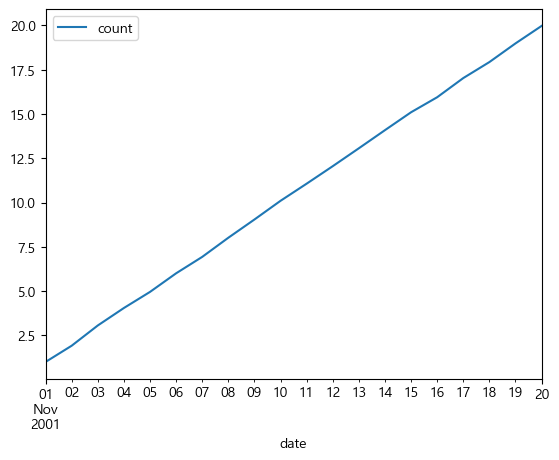

In [4]:
df.plot()
plt.show()

In [5]:
n = len(df)//2

In [6]:
print( df.iloc[:n].mean() )
print( df.iloc[:n].var() )

count    5.504882
dtype: float64
count    9.308281
dtype: float64


In [9]:
from statsmodels.graphics.tsaplots import plot_acf, acf

In [10]:
result = acf( df['count'] )
result

array([ 1.        ,  0.85051096,  0.70111766,  0.55770427,  0.41727086,
        0.28272744,  0.15409016,  0.03335875, -0.07545946, -0.17166745,
       -0.25369122, -0.32166247, -0.37250429, -0.40465095])

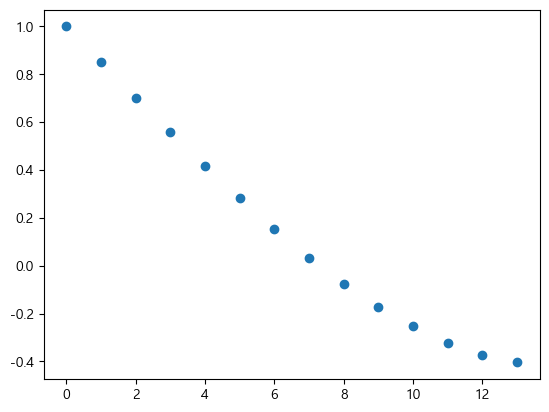

In [11]:
plt.scatter( range(0,len(result) ), result)
plt.show()

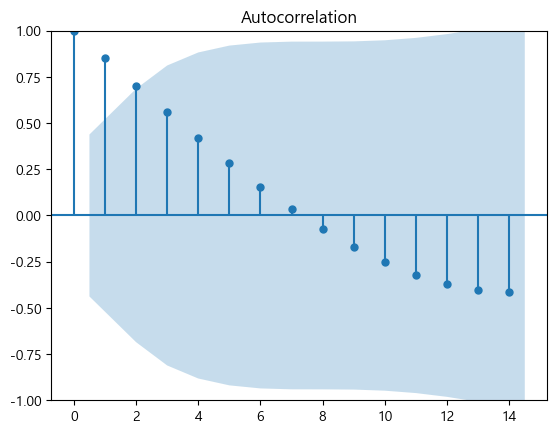

In [12]:
plot_acf( df['count'] )
plt.show()

In [3]:
from statsmodels.tsa.stattools import adfuller

In [13]:
result = adfuller( df['count'])
print( result )
print('----------------')
print( result[0]) # adf (적을수록:귀무가설을 기각시킬 확률이 높다)
print( result[1]) # p-value  귀무가설 기각

(-7.573269903543925, 2.8045464591299073e-11, 8, 11, {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}, -63.32835115384414)
----------------
-7.573269903543925
2.8045464591299073e-11


In [14]:
import statsmodels as sm

In [15]:
sm.__version__

'0.13.2'

In [16]:
from statsmodels.tsa.arima.model import ARIMA

In [18]:
model = ARIMA( df, order= (2,1,2) )
rfit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed t

In [19]:
rfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  count   No. Observations:                   20
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  19.349
Date:                Mon, 12 Dec 2022   AIC                            -28.698
Time:                        15:41:19   BIC                            -23.976
Sample:                    11-01-2001   HQIC                           -27.899
                         - 11-20-2001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1475      0.406      0.363      0.717      -0.649       0.944
ar.L2          0.8524      0.407      2.093      0.036       0.054       1.651
ma.L1         -0.4909      0.827     -0.594      0.553      -2.112       1.130
ma.L2         -0.3434      0.996     -0.345      0.730      -2.295       1.608
sigma2         0.0056      0.002      2.249      0.025       0.001       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 2.40
Prob(Q):                              0.75   Prob(JB):                         0.30
Heteroskedasticity (H):               0.51   Skew:                            -0.81
Prob(H) (two-sided):                  0.44   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
rfit.aic

-28.698063101733297

In [21]:
from warnings import filterwarnings
filterwarnings("ignore")

In [22]:
def arima_aic_check(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p:{p} d:{d} q:{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df

In [23]:
arima_aic_check( df, [3,3,3] )

,order,AIC
16,p:1 d:2 q:1,-38.853241
8,p:0 d:2 q:2,-38.358663
17,p:1 d:2 q:2,-36.894688
25,p:2 d:2 q:1,-36.893263
26,p:2 d:2 q:2,-36.473707
7,p:0 d:2 q:1,-35.651437
24,p:2 d:2 q:0,-34.923559
22,p:2 d:1 q:1,-33.941793
14,p:1 d:1 q:2,-33.428191
15,p:1 d:2 q:0,-32.849821
